<a href="https://colab.research.google.com/github/Mariana0123/ComputationalSimulation/blob/main/Simulador_Vollkron_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Controlador - Vollkron**

Parte 1 - Atribuição de valores para variáveis preestabelecidas


In [ ]:
picomaximofcard = -1000
estadoderesistencia = 0
contadordepicofcard = 0
picomaximoflu = 0
picominimoflu = 0
constantederotacao = 0
xfluxodevelocidadedabomba = 0
fluxoreal = []
kp1 = 400
kp2 = 83.3
kp3 = 600
kp4 = 800

Parte 2 - Solicitação de valores de entrada

In [ ]:
freqcardrepouso = float(input("Médico, entre com a frequência cardíaca durante o repouso:\n(exemplo: 30)\n"))
freqcardexercicio = float(input("\nEntre com a frequência cardíaca durante o exercício: \n(exemplo: 120)\n"))
fluxocoracaoexercicio = float(input("\nEntre com o fluxo em exercício: \n(exemplo: 10)\n"))
fluxocoracaoemrepouso = float(input("\nEntre com o valor de fluxo em repouso: \n(exemplo: 3)\n"))
estadodefluxodabomba = float(input("\nEntre com o estado de fluxo da bomba: \n(exemplo: 4)\n"))
rotacaoreal = (4000 * estadodefluxodabomba)/10
estadocardiacodopaciente = float(input("\nEntre com o estado cardíaco do paciente: \n(exemplo: 60)\n"))
freqseg = estadocardiacodopaciente/60
Potmaxdesejada = float(input("\nEntre com a potência máxima desejada da bomba: \n(exemplo: 48)\n"))
P2Pdesejado = float(input("\nEntre com o fluxo P2P desejado da bomba: \n(exemplo: 2)\n"))


Médico, entre com a frequência cardíaca durante o repouso:
(exemplo: 30)
30

Entre com a frequência cardíaca durante o exercício: 
(exemplo: 120)
120

Entre com o fluxo em exercício: 
(exemplo: 10)
10

Entre com o valor de fluxo em repouso: 
(exemplo: 3)
3

Entre com o estado de fluxo da bomba: 
(exemplo: 4)
4

Entre com o estado cardíaco do paciente: 
(exemplo: 60)
60

Entre com a potência máxima desejada da bomba: 
(exemplo: 48)
48

Entre com o fluxo P2P desejado da bomba: 
(exemplo: 2)
2


Parte 3 - Simulação de um coração saudável e de um com IC

In [ ]:
import math

tempodeamostragem = []
pressaosimuladaIC = []
fluxosimuladoIC = []
pressaosimulada = []
fluxosimulado = []

for i in range(100):
  tempodeamostragem = [i * 0.0628]
  for t in tempodeamostragem:
      pressaosimuladaIC.insert(i,(30 * math.sin(6.28 * freqseg * t) + 110))
      fluxosimuladoIC.insert(i,(1.1 * math.sin(6.28 * freqseg * t) + 1.1))
      if estadocardiacodopaciente < 60:
        pressaosimulada.insert(i, (20 * math.sin(6.28 * freqseg * t) + 100))
        fluxosimulado.insert(i,(1 * math.sin(6.28 * freqseg * t) + 4.5))
        estadoderesistencia = 125
      elif (estadocardiacodopaciente >= 60 and estadocardiacodopaciente < 100):
        pressaosimulada.insert(i, (22.5 * math.sin(6.28 * freqseg * t) + 107.5))
        fluxosimulado.insert(i,(1 * math.sin(6.28 * freqseg * t) + 6.1))
        estadoderesistencia = 250
      else:
        pressaosimulada.insert(i,(1 * math.sin(6.28 * freqseg * t) + 140))
        fluxosimulado.insert(i,(4 * math.sin(6.28 * freqseg * t) + 11.1))
        estadoderesistencia = 500;

Parte 4 - Estimadador de frequência cardíaca

In [ ]:
  for i in range(0, 32):
     if pressaosimulada[i] > pressaosimulada[i-1]:
        picomaximofcard = pressaosimulada[i]
     elif (picomaximofcard != -1000):
        contadordepicofcard += 1
        picomaximofcard = -1000

  frequencia_cardiaca_estimada = contadordepicofcard * 30
  print("A frequência cardíaca estimada é de: {:d}".format(frequencia_cardiaca_estimada))
  contadordepicofcard = 0

A frequência cardíaca estimada é de: 60


Parte 5 - Estimador de fluxo P2P real


In [ ]:
  for i in range(0, 32):
      fluxoreal.insert(i, (fluxosimulado[i] - fluxosimuladoIC[i]))
      l = i-1
      if(fluxoreal[i] > fluxoreal[l]):
        picomaximoflu = fluxoreal[i]
      else:
        picominimoflu = fluxoreal[i]

P2Preal = picomaximoflu - picominimoflu

print("\nO pico mínimo é: {:.4f}".format(picominimoflu))
print("\nO pico máximo é: {:.4f}".format(picomaximoflu))
print("\nO P2Preal é: {:.4f}".format(P2Preal))



O pico mínimo é: 5.0334

O pico máximo é: 5.0999

O P2Preal é: 0.0665


Parte 6 - Estimador de fluxo desejado:

In [ ]:
coeficientedareta = (fluxocoracaoexercicio - fluxocoracaoemrepouso) / (freqcardexercicio - freqcardrepouso)
fluxodesejado = (coeficientedareta * (estadocardiacodopaciente - freqcardrepouso)) + fluxocoracaoemrepouso
print("\nINFORMAÇÕES: \nValor de fluxo P2P: {:.3f}\nPotência máxima admissível: {:.3f}\nFluxo mínimo: {:.3f}\nFluxo desejado: {:.3f} l/min\n".format(P2Pdesejado, Potmaxdesejada, fluxocoracaoemrepouso, fluxodesejado))


INFORMAÇÕES: 
Valor de fluxo P2P: 2.000
Potência máxima admissível: 48.000
Fluxo mínimo: 3.000
Fluxo desejado: 5.333 l/min



Parte 7 - Simular o controlador

In [ ]:
print("\nINFORMAÇÕES\n")
pressaoreal = []
fluxoreal = []
Xfluxo = []
Xfluxominimo = []
tempodeamostragem =[]
valoresdexpot = []
valoresdexp2p = []
valoresdexfluxodevelocidadedabomba = []
valoresdexvelocidade = []

for i in range(100):
    tempodeamostragem.insert(i, (i * 0.0628))
    pressaoreal.insert(i,(pressaosimuladaIC[i] - pressaosimulada[i]))
    fluxoreal.insert(i,(fluxosimulado[i] - fluxosimuladoIC[i] + xfluxodevelocidadedabomba))
    rotacaoreal = (4000 * fluxoreal[i]) / 10
    rotacaoreal = rotacaoreal - estadoderesistencia
    correntereal = (2 * rotacaoreal) / 4000
    Potreal = correntereal * 24

    if fluxoreal[i] > fluxoreal[i - 1]:
        picomaximoflu = fluxoreal[i]
    else:
        picominimoflu = fluxoreal[i]

    if i % 31 == 0:
        picomaximoflu = -1000
        picominimoflu = 1000

    if picomaximoflu > -100 and picominimoflu < 100:
        P2Preal = picomaximoflu - picominimoflu

    Xfluxo.insert(i,((fluxodesejado - fluxoreal[i]) * kp1))
    Xpot = (Potmaxdesejada - Potreal) * kp2
    valoresdexpot.append(Xpot)
    XP2P = (P2Preal - P2Pdesejado) * kp3
    valoresdexp2p.append(XP2P)

    print("Em {:.4f} seg: Xfluxo(t) = {:.2f}, Xpot(t) = {:.2f}, XP2P(t) = {:.2f}".format(tempodeamostragem[i], Xfluxo[i], Xpot, XP2P))

for i in range(100):

    if Xfluxo[i] < Xpot and Xfluxo[i] < XP2P:
        Xseccao1 = Xfluxo[i]
    elif Xpot < Xfluxo[i] and Xpot < XP2P:
        Xseccao1 = Xpot
    else:
        Xseccao1 = XP2P

    Xfluxominimo.append((fluxoreal[i] - fluxocoracaoemrepouso) * kp4)

    if Xfluxominimo[i] > Xseccao1:
        Xvelocidade = Xfluxominimo[i]
        valoresdexvelocidade.append(Xvelocidade)
    else:
        Xvelocidade = Xseccao1
        valoresdexvelocidade.append(Xvelocidade)

    Xfluxodevelocidadedabomba = (Xvelocidade * 10) / 4000
    valoresdexfluxodevelocidadedabomba.append(Xfluxodevelocidadedabomba)
    print("O maior valor entre {:.2f} e {:.2f} é: {:.2f} com fluxo de {:.2f}".format(Xseccao1, Xfluxominimo[i], Xvelocidade, Xfluxodevelocidadedabomba))


INFORMAÇÕES

Em 0.0000 seg: Xfluxo(t) = 133.33, Xpot(t) = 2249.10, XP2P(t) = -1081.32
Em 0.0628 seg: Xfluxo(t) = 148.70, Xpot(t) = 2264.46, XP2P(t) = -1081.32
Em 0.1256 seg: Xfluxo(t) = 161.71, Xpot(t) = 2277.47, XP2P(t) = -1081.32
Em 0.1884 seg: Xfluxo(t) = 170.37, Xpot(t) = 2286.12, XP2P(t) = -1081.32
Em 0.2512 seg: Xfluxo(t) = 173.33, Xpot(t) = 2289.08, XP2P(t) = -1081.32
Em 0.3140 seg: Xfluxo(t) = 170.16, Xpot(t) = 2285.91, XP2P(t) = -1195.24
Em 0.3768 seg: Xfluxo(t) = 161.33, Xpot(t) = 2277.09, XP2P(t) = -1182.00
Em 0.4396 seg: Xfluxo(t) = 148.20, Xpot(t) = 2263.96, XP2P(t) = -1162.31
Em 0.5024 seg: Xfluxo(t) = 132.79, Xpot(t) = 2248.56, XP2P(t) = -1139.19
Em 0.5652 seg: Xfluxo(t) = 117.47, Xpot(t) = 2233.24, XP2P(t) = -1116.20
Em 0.6280 seg: Xfluxo(t) = 104.58, Xpot(t) = 2220.35, XP2P(t) = -1096.87
Em 0.6908 seg: Xfluxo(t) = 96.10, Xpot(t) = 2211.88, XP2P(t) = -1084.15
Em 0.7536 seg: Xfluxo(t) = 93.34, Xpot(t) = 2209.12, XP2P(t) = -1080.01
Em 0.8164 seg: Xfluxo(t) = 96.72, Xpot(

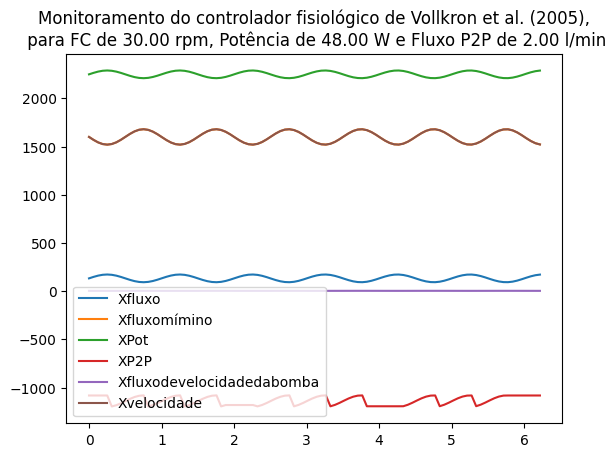

In [ ]:
import matplotlib.pyplot as plt
plt.plot(tempodeamostragem, Xfluxo, label='Xfluxo')
plt.plot(tempodeamostragem, Xfluxominimo, label='Xfluxomímino')
plt.plot(tempodeamostragem, valoresdexpot, label='XPot')
plt.plot(tempodeamostragem, valoresdexp2p, label='XP2P')
plt.plot(tempodeamostragem, valoresdexfluxodevelocidadedabomba, label='Xfluxodevelocidadedabomba')
plt.plot(tempodeamostragem, valoresdexvelocidade, label='Xvelocidade')
plt.title('Monitoramento do controlador fisiológico de Vollkron et al. (2005),\n para FC de {:.2f} rpm, Potência de {:.2f} W e Fluxo P2P de {:.2f} l/min'.format(freqcardrepouso, Potmaxdesejada, P2Pdesejado))
plt.legend()
plt.show()